In [2]:
#númerica, vectores y matrices
import numpy as np
#tratamiento de datos
import pandas as pd
#graficación
import matplotlib.pyplot as plt

In [10]:
#generar los datos gradon
X=7*np.random.rand(100,1)-1
pd.DataFrame(X).head()


,0
0,-0.580070
1,3.806909
2,2.668428
3,5.698591
4,5.156573


In [12]:
#generar la variable dependiente, Target
y=2*X**2+0.5*X+ np.random.randn(100,1)
pd.DataFrame(y).head()

,0
0,1.633920
1,29.994688
2,15.300953
3,65.687406
4,55.899165


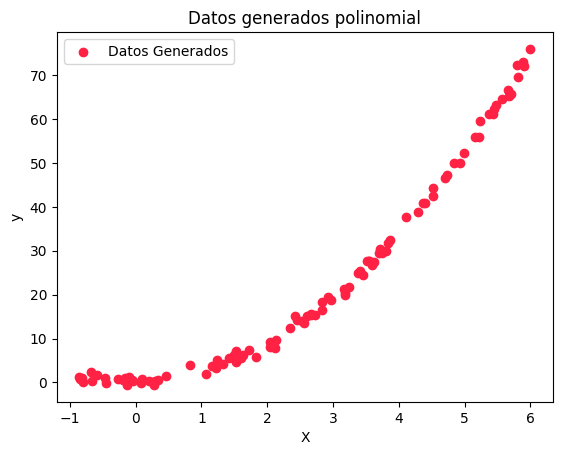

In [43]:
plt.scatter(X,y,color='#FF2244',label='Datos Generados', marker='o')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos generados polinomial')
plt.legend()
plt.show()

In [29]:
#colocamos la biblioteca para procesamiento polinomial
from sklearn.preprocessing import PolynomialFeatures
#biblioteca de regresión lineal
from sklearn.linear_model import LinearRegression


In [64]:
#trabajamos el grado del polinomio
#include_bias=False, no saca el 1 de la matriz
poly_caracteristicas= PolynomialFeatures(degree=2, include_bias=True)
#Cambiar el grado de las X
X_polynomion= poly_caracteristicas.fit_transform(X)
pd.DataFrame(X_polynomion).head()


,0,1,2
0,1.0,-0.580070,0.336481
1,1.0,3.806909,14.492559
2,1.0,2.668428,7.120508
3,1.0,5.698591,32.473941
4,1.0,5.156573,26.590249


In [65]:
#realizamos el entrenamiento
modelo_lineal= LinearRegression()
#entrena para sacar los Theta, y arrojar el modelo
modelo_lineal.fit(X_polynomion,y)

LinearRegression()

In [66]:
#se realiza la predicción de datos
y_pred=modelo_lineal.predict(X_polynomion)
pd.DataFrame(y_pred).head()

,0
0,0.758813
1,30.863940
2,15.564030
3,67.890502
4,55.800409


In [67]:
#Generar datos en el  rango de X original (-1,6)
X_nuevo= np.linspace(-1,6,100).reshape(100,1)
pd.DataFrame(X_nuevo).head()

,0
0,-1.000000
1,-0.929293
2,-0.858586
3,-0.787879
4,-0.717172


In [68]:
#estádisticas del dato nuevo
pd.DataFrame(X_nuevo).describe()

,0
count,100.000000
mean,2.500000
std,2.051318
min,-1.000000
25%,0.750000
50%,2.500000
75%,4.250000
max,6.000000


In [69]:
#transformo los datos generados, en el rango de x de los datos originales, al grado del polinomio
X_nuevoPolinomio= poly_caracteristicas.fit_transform(X_nuevo)
y_nuevo= modelo_lineal.predict(X_nuevoPolinomio)
y_nuevo

array([[ 1.96362425],
       [ 1.71077112],
       [ 1.47816065],
       [ 1.26579284],
       [ 1.07366768],
       [ 0.90178519],
       [ 0.75014535],
       [ 0.61874816],
       [ 0.50759364],
       [ 0.41668177],
       [ 0.34601256],
       [ 0.29558601],
       [ 0.26540211],
       [ 0.25546087],
       [ 0.26576229],
       [ 0.29630637],
       [ 0.34709311],
       [ 0.4181225 ],
       [ 0.50939455],
       [ 0.62090926],
       [ 0.75266662],
       [ 0.90466664],
       [ 1.07690932],
       [ 1.26939466],
       [ 1.48212266],
       [ 1.71509331],
       [ 1.96830662],
       [ 2.24176259],
       [ 2.53546121],
       [ 2.84940249],
       [ 3.18358643],
       [ 3.53801303],
       [ 3.91268229],
       [ 4.3075942 ],
       [ 4.72274877],
       [ 5.158146  ],
       [ 5.61378588],
       [ 6.08966843],
       [ 6.58579363],
       [ 7.10216148],
       [ 7.638772  ],
       [ 8.19562517],
       [ 8.772721  ],
       [ 9.37005949],
       [ 9.98764063],
       [10

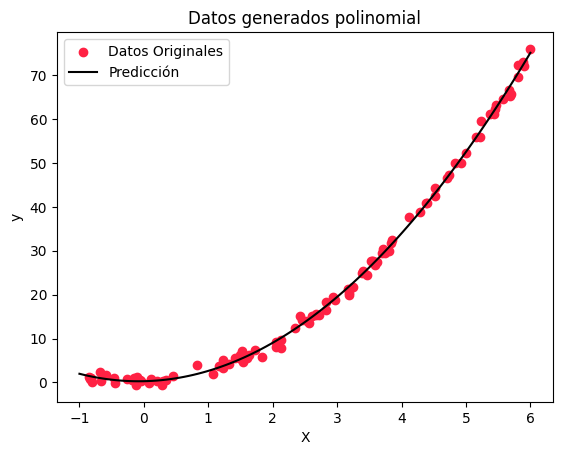

In [70]:
#graficamos, los datos originales, con la predicción, en el mismo rango
plt.scatter(X,y,color='#FF2244',label='Datos Originales', marker='o')
plt.plot(X_nuevo,y_nuevo,color='#000000',label='Predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos generados polinomial')
plt.legend()
plt.show()

In [71]:
#llamo a la biblioteca de calcular que tan exacto es el modelo
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9982881763195762